In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [4]:
#Load the dataset

data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [6]:
#Printing the shape of data

data.shape

(349, 10)

In [8]:
#check for the missing values

data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

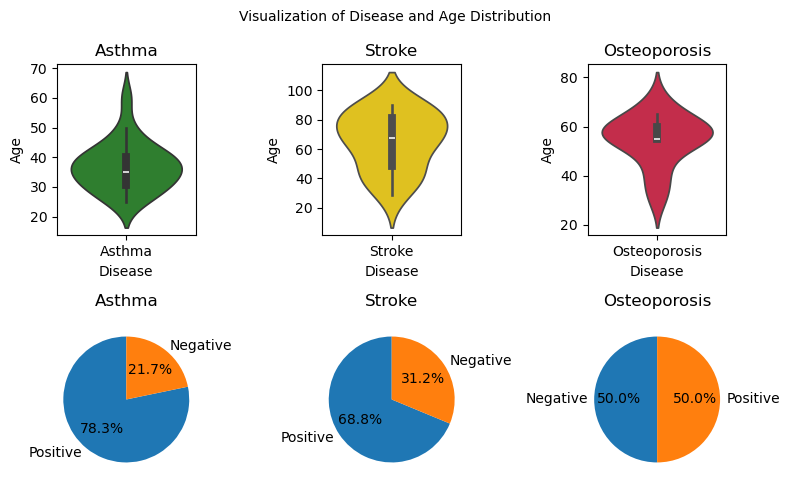

In [10]:
top_diseases = data['Disease'].value_counts().nlargest(3).index.tolist()

colors = ['forestgreen', 'gold', 'crimson']

num_diseases = len(top_diseases)
num_columns = num_diseases
fig, axes = plt.subplots(2, num_columns, figsize=(8, 5))

for i, disease in enumerate(top_diseases):
    filtered_df = data[data['Disease'] == disease]

    sns.violinplot(x='Disease', y='Age', data=filtered_df, ax=axes[0, i], color=colors[i % len(colors)])
    axes[0, i].set_title(disease)
    axes[0, i].set_xlabel('Disease')
    axes[0, i].set_ylabel('Age')
    
    outcome_counts = filtered_df['Outcome Variable'].value_counts()

    axes[1, i].pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, i].set_title(disease)
    axes[1, i].axis('equal')
    
fig.suptitle('Visualization of Disease and Age Distribution', fontsize = 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Age Distribution by Objective Value')

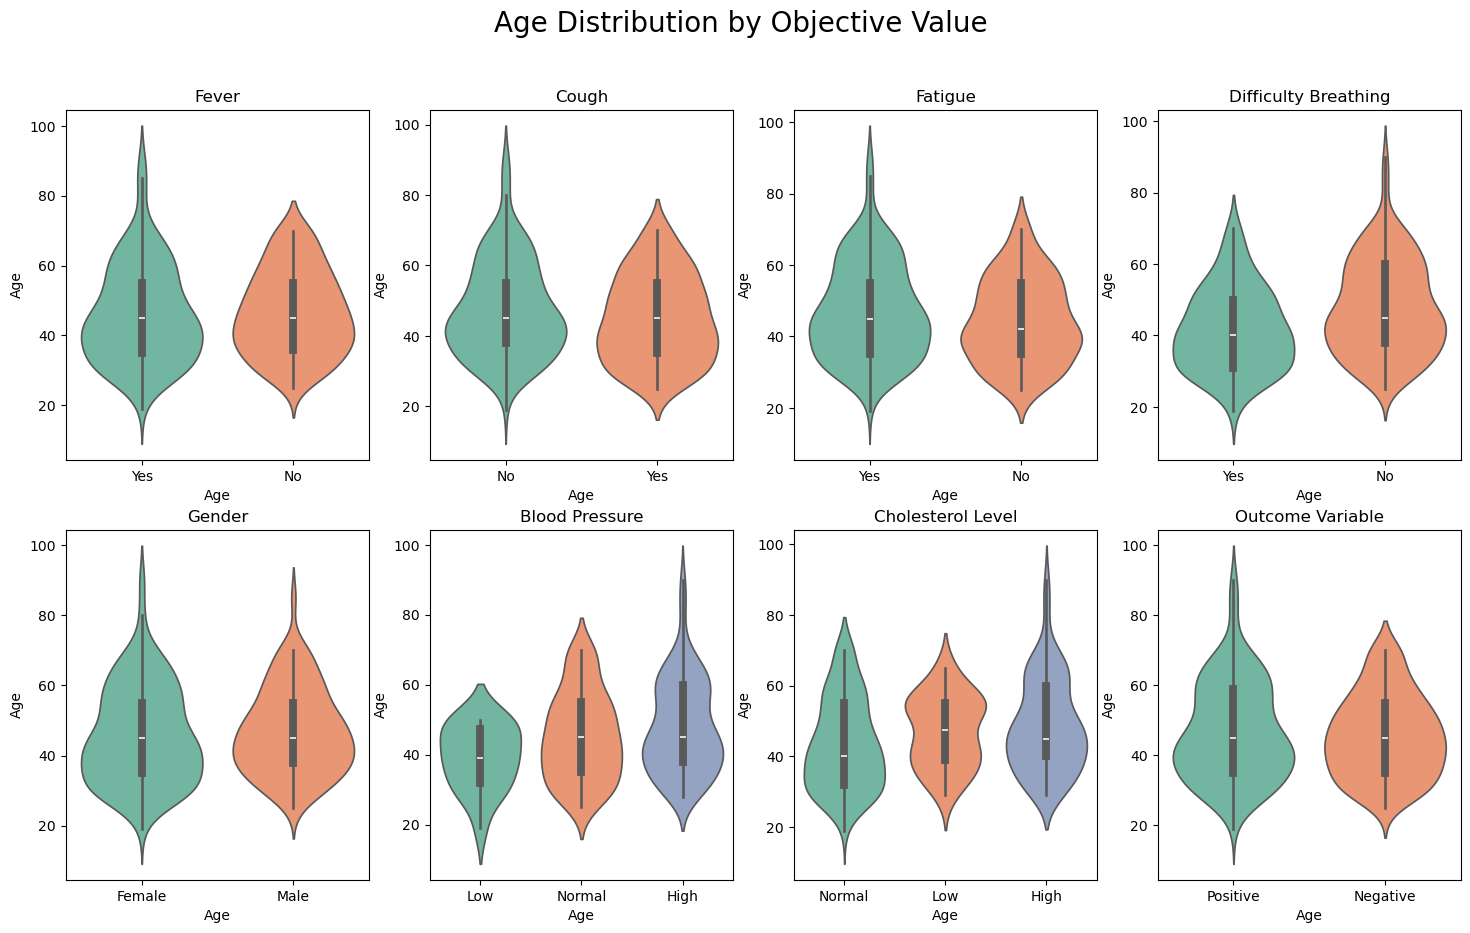

In [12]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable']

fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (18,10))
ax = ax.flatten()

for i,col in enumerate(cols):
    sns.violinplot(data = data,x = col,y = 'Age',ax = ax[i], scale="count", palette='Set2')
    
    ax[i].set_title(col)
    ax[i].set_xlabel('Age')
    
fig.suptitle('Age Distribution by Objective Value', fontsize = 20)

In [14]:
#Encoding categorical variables
var_mod = ['Disease','Fever','Cough','Fatigue','Difficulty Breathing','Gender','Blood Pressure','Cholesterol Level','Outcome Variable']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,6,1,1,0,1,25,1,2,2,1


Text(0.5, 1.0, 'Pearson Correlation')

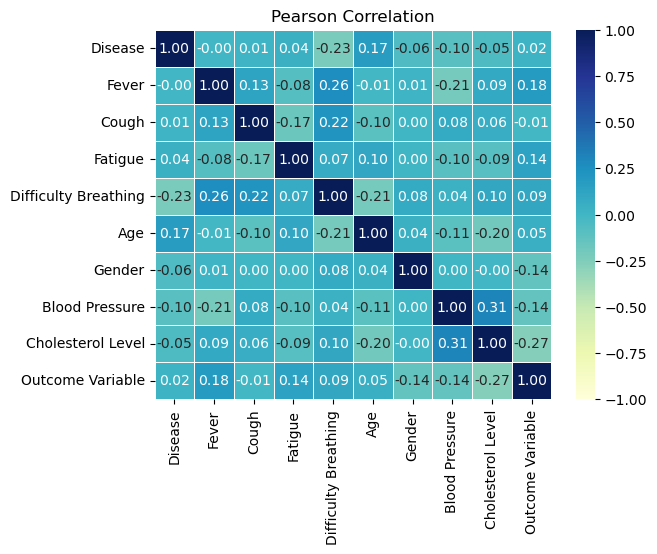

In [16]:
#Correlation Heatmap

corr_matrix = data.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns="Outcome Variable")
y = data['Outcome Variable']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 9)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((261, 9), (261,)), ((88, 9), (88,)))

In [22]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

algorithms = {'Logistic Regression': 
              {"model": LogisticRegression(),
               "params": {"penalty": ['elasticnet','l1','l2'],"solver": ["newton-cg", "lbfgs","liblinear",'sag',"saga"]}
              },
              
              'Decision Tree': 
              {"model": tree.DecisionTreeClassifier(),
               "params": {"criterion": ['gini','entropy'],"max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
                          "min_samples_split": [2, 4, 6, 8, 10, 15, 20],"min_samples_leaf": [i for i in range(1, 11)]}
              },
              
              'Random Forest': 
              {"model": RandomForestClassifier(),
               "params": {"n_estimators": [100, 200, 300],"max_features": ["auto", "log2", "sqrt", None],
                          "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],"min_samples_split": [2, 4, 6, 8, 10, 15, 20]}
              },
              
              'SVM':
              {"model": svm.SVC(probability=True),
               "params": {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],"gamma": ["auto","scale"]}
              },
               'Neural Network': {
               "model": MLPClassifier(max_iter=1000),
               "params": {
               "hidden_layer_sizes": [(50,), (100,), (50, 50)],
               "activation": ['relu', 'tanh'],
               "solver": ['adam', 'sgd'],
               "alpha": [0.0001, 0.05],
               "learning_rate": ['constant', 'adaptive']
              }
               }
                }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
best_model = {}
best_model_details = []

for model_name, values in algorithms.items():
    best_score = float('-inf')
    best_random_state = None

    for random_state in range(100):  # Iterate over different random states
        rscv = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=15, n_jobs=-1, verbose=0, random_state=random_state)
        rscv.fit(X_train, y_train)

        if rscv.best_score_ > best_score:
            best_score = rscv.best_score_
            best_random_state = random_state

    best_model[model_name] = rscv
    best_model_details.append({"Model Name": model_name, "Best Score": best_score, "Best Parameters": rscv.best_params_, 
                               "Best Random State": best_random_state})
    print(model_name)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(best_model_details)

In [28]:
test_model = []

for model_name, model in best_model.items():
    test_model.append({"Model Name": model_name, "Test Score": model.score(X_test, y_test)})

pd.DataFrame(test_model)

,Model Name,Test Score
0,Logistic Regression,0.647727
1,Decision Tree,0.670455
2,Random Forest,0.806818
3,SVM,0.727273
4,Neural Network,0.738636


In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate each model
train_model_metrics = []
test_model_metrics = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions for training data
    y_pred_train = model.predict(X_train)
    y_pred_train_probs = model.predict_proba(X_train)[:, 1]
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    
    # Predictions for testing data
    y_pred_test = model.predict(X_test)
    y_pred_test_probs = model.predict_proba(X_test)[:, 1]
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
    
    # Training metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    # Testing metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Collecting training metrics
    train_model_metrics.append({
        "Model Name": model_name, 
        "Accuracy": train_accuracy,
        "Precision": train_precision,
        "Recall": train_recall,
        "F1 Score": train_f1,
       
    })
    
    # Collecting testing metrics
    test_model_metrics.append({
        "Model Name": model_name, 
        "Accuracy": test_accuracy,
        "Precision": test_precision,
        "Recall": test_recall,
        "F1 Score": test_f1,
        
    })
    
# Convert to DataFrame
train_model_metrics_df = pd.DataFrame(train_model_metrics)
test_model_metrics_df = pd.DataFrame(test_model_metrics)

# Display results
print("Training Metrics:")
print(train_model_metrics_df)
print("\nTesting Metrics:")
print(test_model_metrics_df)


Training Metrics:
            Model Name  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.85875   0.861728  0.859606  0.860666
1        Decision Tree   1.00000   1.000000  1.000000  1.000000
2        Random Forest   1.00000   1.000000  1.000000  1.000000
3                  SVM   0.88500   0.890547  0.881773  0.886139
4       Neural Network   0.99875   1.000000  0.997537  0.998767

Testing Metrics:
            Model Name  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression     0.875   0.863636  0.853933  0.858757
1        Decision Tree     0.865   0.836957  0.865169  0.850829
2        Random Forest     0.920   0.910112  0.910112  0.910112
3                  SVM     0.885   0.875000  0.865169  0.870056
4       Neural Network     0.885   0.858696  0.887640  0.872928


In [ ]:
print("-------- Test Data Metrics --------")
test_model_metrics

In [ ]:
print("-------- Training Data Metrics --------")
train_model_metrics

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\1367841035.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_1824\1367841035.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_1824\1367841035.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=df, ax=axes[1, 0], palette='viridis')
C:\Users\HP\Ap

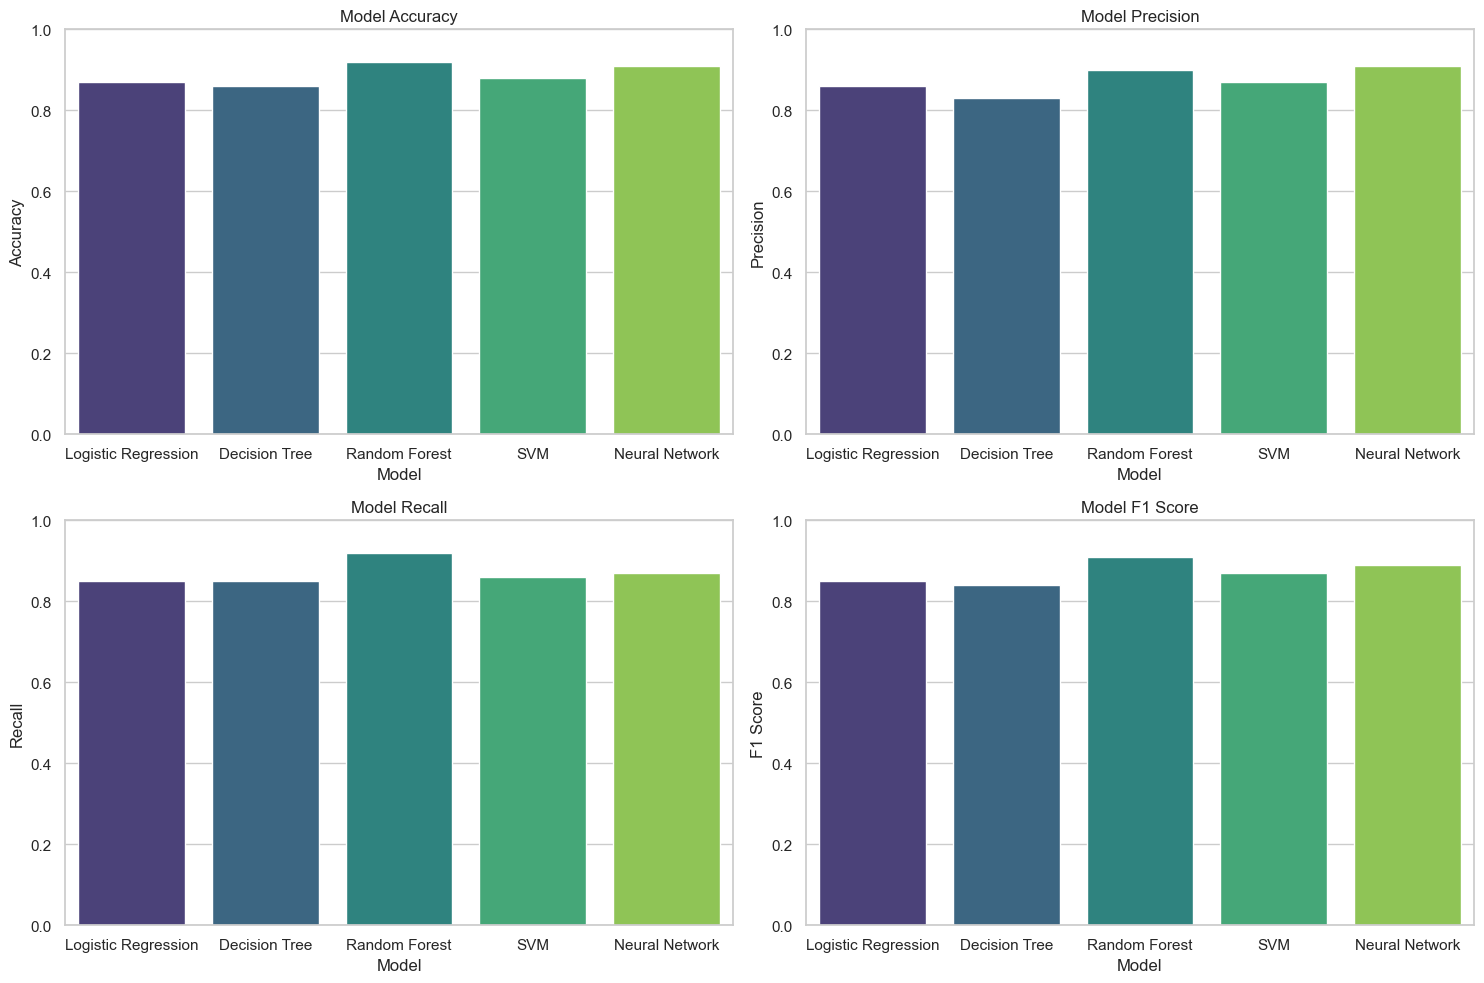

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Actual evaluation results
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network'],
    'Accuracy': [0.87, 0.86, 0.92, 0.88, 0.91],
    'Precision': [0.86, 0.83, 0.90, 0.87, 0.91],
    'Recall': [0.85, 0.85, 0.92, 0.86, 0.87],
    'F1 Score': [0.85, 0.84, 0.91, 0.87, 0.89]
}

#Convert to DataFrame
df = pd.DataFrame(data)

#Set plot style
sns.set(style="whitegrid")

#Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Accuracy plot
sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_ylim(0, 1)

#Precision plot
sns.barplot(x='Model', y='Precision', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Model Precision')
axes[0, 1].set_ylim(0, 1)

#Recall plot
sns.barplot(x='Model', y='Recall', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Model Recall')
axes[1, 0].set_ylim(0, 1)

#F1 Score plot
sns.barplot(x='Model', y='F1 Score', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Model F1 Score')
axes[1, 1].set_ylim(0, 1)

#Adjust layout
plt.tight_layout()

#Show plot
plt.show()